In [24]:
import pandas as pd

df_pass = pd.read_parquet("hf://datasets/rag-datasets/rag-mini-bioasq/data/passages.parquet/part.0.parquet")
df_test = pd.read_parquet("hf://datasets/rag-datasets/rag-mini-bioasq/data/test.parquet/part.0.parquet")

In [25]:
print(df_pass.columns)
print(len(df_pass))
df_pass.head()

Index(['passage'], dtype='object')
40221


,passage
id,
9797,New data on viruses isolated from patients wit...
11906,We describe an improved method for detecting d...
16083,We have studied the effects of curare on respo...
23188,Kinetic and electrophoretic properties of 230-...
23469,Male Wistar specific-pathogen-free rats aged 2...


In [26]:
from langchain_core.documents import Document
print(df_pass.iloc[0])
docs = [Document(page_content=row["passage"]) for _, row in df_pass.iterrows()]

passage    New data on viruses isolated from patients wit...
Name: 9797, dtype: string


In [27]:
df_test.head()

,question,answer,relevant_passage_ids
id,,,
0,Is Hirschsprung disease a mendelian or a multi...,"Coding sequence mutations in RET, GDNF, EDNRB,...","[20598273, 6650562, 15829955, 15617541, 230011..."
1,List signaling molecules (ligands) that intera...,The 7 known EGFR ligands are: epidermal growt...,"[23821377, 24323361, 23382875, 22247333, 23787..."
2,Is the protein Papilin secreted?,"Yes, papilin is a secreted protein","[21784067, 19297413, 15094122, 7515725, 332004..."
3,Are long non coding RNAs spliced?,Long non coding RNAs appear to be spliced thro...,"[22955974, 21622663, 22707570, 22955988, 24285..."
4,Is RANKL secreted from the cells?,Receptor activator of nuclear factor κB ligand...,"[22867712, 23827649, 21618594, 23835909, 24265..."


In [28]:
df_test.describe()

,question,answer,relevant_passage_ids
count,4719,4719,4719
unique,4719,4693,4596
top,Is the monoclonal antibody Trastuzumab (Hercep...,Yes,[32266704]
freq,1,11,4


In [29]:
ids_list = df_test["relevant_passage_ids"]
print(ids_list[0])
max = 0
max_idx = 0

for idx, i in enumerate(ids_list):
    i_list = eval(i)
    if len(i_list) > max:
        max = len(i_list)
        max_idx = i_list
max, max_idx


[20598273, 6650562, 15829955, 15617541, 23001136, 8896569, 21995290, 12239580, 15858239]


(157,
 [22172672,
  17603073,
  22033927,
  19399177,
  22834704,
  21953552,
  18846226,
  22039057,
  22855185,
  12186646,
  12397079,
  23448600,
  15304225,
  21358630,
  18725928,
  17253929,
  21505064,
  21278251,
  20308527,
  22514736,
  21623345,
  22216243,
  23319608,
  22223433,
  22462537,
  22302795,
  21211724,
  19205716,
  11956312,
  16412250,
  22412383,
  18369641,
  16949368,
  21419134,
  22683269,
  22186629,
  23142031,
  22551706,
  22569126,
  20389031,
  21596839,
  21726377,
  22419124,
  22086334,
  23239876,
  12819141,
  21646535,
  22235338,
  19897549,
  11859155,
  22427862,
  20860631,
  22715096,
  21636313,
  23071455,
  21060834,
  22022377,
  16613610,
  21730028,
  21979373,
  22897906,
  22815475,
  23318260,
  23271156,
  22691070,
  7720711,
  16339723,
  23403278,
  21158681,
  16407326,
  23282990,
  16537902,
  21094707,
  17428788,
  22768949,
  19279158,
  22203189,
  8663349,
  22705977,
  22193973,
  21177652,
  22491446,
  18450745,


In [33]:
exp_test = pd.read_csv("rag-mini-bioasq_evaluation_results.csv")
exp_test.head()


,id,question,ground_truth,top_k,predicted_answer,context_ids,relevant_passages_ids,num_relevant_passages,max_num_relevant_passages,retrieved_ratio
0,0,Is Hirschsprung disease a mendelian or a multi...,"Coding sequence mutations in RET, GDNF, EDNRB,...",20,No answer generated,"[15617541, 23001136, 2309705, 16816022, 122395...","[20598273, 6650562, 15829955, 15617541, 230011...",3,9,0.333333
1,1,List signaling molecules (ligands) that intera...,The 7 known EGFR ligands are: epidermal growt...,20,No answer generated,"[23382875, 34667080, 29680500, 16159418, 15871...","[23821377, 24323361, 23382875, 22247333, 23787...",4,16,0.250000
2,2,Is the protein Papilin secreted?,"Yes, papilin is a secreted protein",20,No answer generated,"[15094122, 3320045, 11076767, 12666201, 114199...","[21784067, 19297413, 15094122, 7515725, 332004...",4,10,0.400000
3,3,Are long non coding RNAs spliced?,Long non coding RNAs appear to be spliced thro...,20,No answer generated,"[24285305, 24655717, 23463798, 22955988, 17387...","[22955974, 21622663, 22707570, 22955988, 24285...",4,6,0.666667
4,4,Is RANKL secreted from the cells?,Receptor activator of nuclear factor κB ligand...,20,No answer generated,"[23241893, 23139212, 1334264, 16424866, 261503...","[22867712, 23827649, 21618594, 23835909, 24265...",1,10,0.100000


array([[<Axes: title={'center': 'retrieved_ratio'}>]], dtype=object)

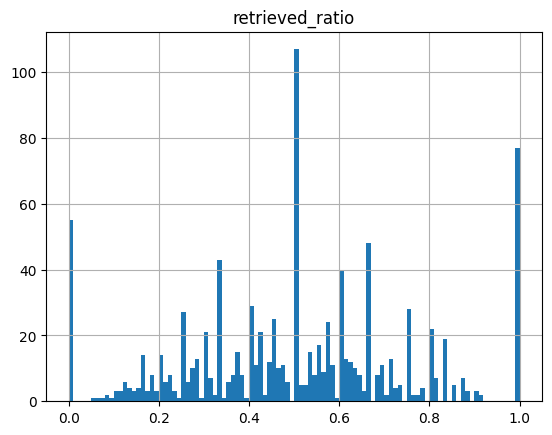

In [34]:
exp_test.hist(column="retrieved_ratio",bins=100)